In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))

In [2]:
import torch
import seaborn as sns
import ristretto.activations as ra
import ristretto.models as rm
import ristretto.utils as ru
import pandas as pd
import numpy as np
# from torch.utils.tensorboard import SummaryWriter

In [3]:
# set pytorch precision
torch.set_default_tensor_type(torch.FloatTensor)
torch.set_default_dtype(torch.bfloat16)

In [4]:
@torch.no_grad()
def get_weight_sum(model):
    return sum([x.weight.sum() for x in model.linear]).item()

In [5]:
models = [
    rm.FullyConnected(activation=lambda: ra.ReLU(0), hidden_dims=[2000], seed=42),
    rm.FullyConnected(activation=lambda: ra.ReLU(0), hidden_dims=[2000], seed=42),
    rm.FullyConnected(activation=lambda: ra.ReLU(1), hidden_dims=[2000], seed=42)
]

In [6]:
metrics = ru.train_multiple_models(
    models,
    ru.default.DATA_LOADERS['MNIST'],
    epochs=1,
    metrics_fn=lambda m, p, y: {"weight_sum": get_weight_sum(m)}
)

===== Model 1 (FullyConnected) =====
---------- Epoch 1 ----------
Validation
    loss:     1.132e-01
    accuracy: 96.45

===== Model 2 (FullyConnected) =====
---------- Epoch 1 ----------
Validation
    loss:     1.132e-01
    accuracy: 96.45

===== Model 3 (FullyConnected) =====
---------- Epoch 1 ----------
Validation
    loss:     1.119e-01
    accuracy: 96.50



In [7]:
diff = pd.DataFrame({
    "0 vs 0": np.abs(metrics[0]["train"]['weight_sum'] - metrics[1]["train"]['weight_sum']),
    "0 vs 1": np.abs(metrics[0]["train"]['weight_sum'] - metrics[2]["train"]['weight_sum'])
})

<AxesSubplot:>

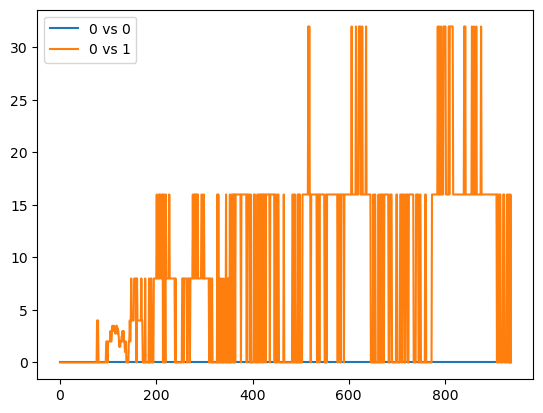

In [8]:
sns.lineplot(data=diff, dashes=False)